# 1. Setup

## Các hàm tiền xử lý dữ liệu

In [1]:
#Lowercase
def lowercase(text):
    return text.lower()

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

from underthesea import word_tokenize

def tokenize(text):
    return word_tokenize(text, format="text")

import urllib
# Download vietnamese stop words
data=urllib.request.urlopen('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt').read()

# Read stop words
stopwords= [ x.decode('utf-8') for x in data.splitlines() ]
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

import re
def remove_html_url(text):
    return re.sub(r'http\S+', '', text)

In [2]:
import emoji

def remove_emoji(text):
    def get_emoji_regexp():
        # Sort emoji by length to make sure multi-character emojis are
    # matched first
        emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
        pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
        return re.compile(pattern)

    exp = get_emoji_regexp()
    return exp.sub(u'', text)

In [3]:
def preprocess_text(text):
    # '''Input : String, output : String'''
      text_url = remove_html_url(text)
      text_emoji = remove_emoji(text_url)
    
      text_lowercase = lowercase(text_emoji)
      text_punctuation = remove_punctuation(text_lowercase)
      
      text_tokenize = tokenize(text_punctuation)
      text_stopwords = remove_stopwords(text_tokenize)
  
      return text_url, text_emoji, text_lowercase, text_punctuation, text_tokenize, text_stopwords

In [20]:
preprocess_text('Tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp.')

('Tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp.',
 'Tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp.',
 'tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp.',
 'tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp',
 'tôi muốn mua một chiếc điện_thoại có cấu_hình cao đủ để chơi game và có camera chụp hình đẹp',
 'mua điện_thoại cấu_hình game camera chụp hình đẹp')

## Hàm sử dụng cuối cùng

In [4]:
def preprocess_text(text):
    # '''Input : String, output : String'''
      text_url = remove_html_url(text)
      text_emoji = remove_emoji(text_url)
    
      text_lowercase = lowercase(text_emoji)
      text_punctuation = remove_punctuation(text_lowercase)
      
      text_tokenize = tokenize(text_punctuation)
      text_stopwords = remove_stopwords(text_tokenize)
  
      return text_stopwords

# 2. Load data

## Read data from csv

In [8]:
import pandas as pd
data = pd.read_csv('tgdd_product_description.csv')

In [9]:
data.sample(5)

,name,description
1606,/dtdd/oppo-reno8-t?utm_flashsale=1,Với 6.4 inch thì mình vẫn có thể xem nội dung ...
3060,/may-tinh-bang/samsung-galaxy-tab-s9-plus-5g,"Camera trước của máy có độ phân giải 12 MP, cả..."
771,/dtdd/samsung-galaxy-s24-plus-5g,Bộ nhớ trong lên đến 256 GB là một điểm đặc bi...
741,/dtdd/samsung-galaxy-s24-256gb-5g,"Với các nhu cầu về chơi game trên điện thoại, ..."
1364,/dtdd/samsung-galaxy-a15-5g,Việc tích hợp cảm biến vân tay vào nút nguồn ở...


## Preprocess data

In [10]:
data['description'] = data['description'].apply(preprocess_text)

In [11]:
data.sample(5)

,name,description
1170,/dtdd/realme-c53,đối_thủ ký pubg mobile bật chế_độ cấu_hình máy...
2072,/dtdd/samsung-galaxy-m54,màn_hình 67 inch samsung galaxy m54 5 g trải_n...
2421,/dtdd/xiaomi-redmi-12,điện_thoại thu_hút thiết_kế mới_lạ khác_biệt t...
669,/dtdd/iphone-15,ảnh trích applecom
1722,/dtdd/samsung-galaxy-z-fold5,công_nghệ tiên_tiến cảm_biến cao_cấp camera sa...


## Save to csv

In [12]:
data.to_csv('tgdd_product_description_preprocessed.csv', index=False)

## Load from csv to reduce runtime

In [4]:
import pandas as pd
data = pd.read_csv('tgdd_product_description_preprocessed.csv')
data.sample(5)

,name,description
1091,/dtdd/samsung-galaxy-s23-fe-5g,điện_thoại cụm camera ấn_tượng 3 ống_kính kích...
3115,/may-tinh-bang/samsung-galaxy-tab-s9-5g-128gb,màn_hình samsung galaxy tab s9 5 g tối_ưu_hóa ...
1559,/dtdd/oppo-reno10-pro-plus,bảng cài_đặt cấu_hình trò_chơi
2512,/dtdd/realme-c51,realme c51 chạy hệ điều_hành android 13 trang_...
3080,/may-tinh-bang/samsung-galaxy-tab-s9-plus,camera máy cảm_biến 13 mp phụ 8 mp đáp_ứng nhu...


## From DataFrame to List

In [5]:
dataDescription = list(data['description'].values)

In [6]:
dataDescription

['đặc_điểm nổi_bật iphone 15 pro •_chế_tác_bộ khung viền chất_liệu titanium cứng_cáp •_sở_hữu_cấu_hình mạnh_mẽ bậc ngành điện_thoại •_camera chụp zoom_quang 3 x • video chất_lượng 4 k khả_năng chống rung đỉnh_cao • thay_thế gạt rung action_button mới_lạ tiện_lợi • chuyển_đổi cổng sạc usbc truyền_tải dữ_liệu tốc_độ',
 'iphone 15 pro điện_thoại thông_minh mong_đợi 2023 tính_năng cải_tiến iphone 15 pro lựa_chọn tuyệt_vời tìm_kiếm điện_thoại cao_cấp',
 '• chất_lượng sản_phẩm thế_giới di_động cam_kết cung_cấp sản_phẩm iphone 15 pro hãng chất_lượng giúp yên_tâm xuất_xứ sản_phẩm tận_hưởng trải_nghiệm',
 '• ưu_đãi khuyến_mãi thế_giới di_động thường_xuyên chương_trình khuyến_mãi giảm_giá tặng quà kèm giúp tiết_kiệm khoản tiền mua iphone 15 pro',
 '• hệ_thống cửa_hàng rộng_rãi thế_giới di_động mạng_lưới cửa_hàng rộng_rãi toàn_quốc giúp dễ_dàng cửa_hàng mua_sắm kiểm_tra sản_phẩm nhân_viên cửa_hàng',
 '• dịch_vụ hậu_mãi thế_giới di_động cung_cấp dịch_vụ hậu_mãi chuyên_nghiệp bao_gồm bảo_hành sửa_c

## Lọc các từ không phải Việt và Anh

In [7]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

In [8]:
## kiem tra ngon ngu
vi = 0
en = 0
remove_index = []
for i in range(len(dataDescription)):
  try:
    if detect(dataDescription[i]) == 'vi':
      vi+=1
    else : 
      en+=1
      remove_index.append(i)
  except:
    remove_index.append(i)
    continue

In [9]:
## loai bo cot ngon ngu
data_old = dataDescription
dataDescription = []
for i in range(len(data_old)):
  if i in remove_index:
    continue
  else : dataDescription.append(data_old[i])

## Đánh đấu keywords bằng TextRank / keyBERT

### TextRank

In [12]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
from underthesea import pos_tag


class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 
        self.min_diff = 1e-5 
        self.steps = 10 
        self.node_weight = None 

    def remove_number(self,doc):
        doc = re.sub(" \d+", " ", doc)
        return doc
    def recovery_sentence(self,doc):
        doc = doc.replace("_"," ")
        return doc
    
    def sentence_segment(self, doc, candidate_pos, lower=None):
        """Store those words only in cadidate_pos"""
        words = []
        for i,j in pos_tag(doc):
          if j in candidate_pos : 
            word_token = i.replace(' ','_')
            words.append(word_token)
        return words

    def get_vocab(self, words):
        """Get all tokens - word_dict"""
        vocab = OrderedDict()
        i = 0
        for word in words:          
          if word not in vocab:
              vocab[word] = i
              i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()

        for i, word in enumerate(sentences):
            for j in range(i+1, i+window_size):
                if j >= len(sentences):
                    break
                pair = (word, sentences[j])
                if pair not in token_pairs:
                    token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        '''xây dựng ma trận đối xứng'''
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
        g = self.symmetrize(g)
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) 
        return g_norm

    
    def get_keywords(self, number=10):
        """in top keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        re = []
        for i, (key, value) in enumerate(node_weight.items()):
            re.append(key)
            if i > number:
                break
        return re
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):

        doc = self.remove_number(text)

        doc = self.recovery_sentence(text)

        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [16]:
label_words = []
for dataDes in dataDescription:
  try:
    if len(dataDes.split()) >= 50 :
      keywords = 25
    elif 50 > len(dataDes.split()) > 25:
      keywords = 20
    else: keywords = 10
    TextRank = TextRank4Keyword()
    TextRank.analyze(dataDes, candidate_pos = ['N','A','V'])
    a = TextRank.get_keywords(keywords)
    label_words.append(a)
  except Exception as e: 
    print(e)
    break

In [20]:
import random
t = random.choice(dataDescription)
t

'máy_tính bảng ram 8 gb oppo pad neo sợ gián_đoạn trì_trệ ứng_dụng môi_trường làm_việc giải_trí mượt_mà cho_phép linh_hoạt chuyển_đổi ứng_dụng lo_lắng hiệu_suất'

In [21]:
label_words[dataDescription.index(t)]

['ứng_dụng',
 'gb',
 'oppo',
 'pad',
 'linh_hoạt',
 'cho_phép',
 'neo',
 'sợ',
 'mượt_mà',
 'ram',
 'giải_trí',
 'gián_đoạn']

### keyBERT

In [10]:
from keybert import KeyBERT

kw_model = KeyBERT()

d:\code\PBL7\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
doc = """
         Tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp.
      """
doc_pre = preprocess_text(doc)
keywords = kw_model.extract_keywords(doc_pre, top_n=10)
keywords

[('điện_thoại', 0.5513),
 ('cấu_hình', 0.5229),
 ('đẹp', 0.5052),
 ('camera', 0.497),
 ('hình', 0.4253),
 ('chụp', 0.3671),
 ('mua', 0.3432),
 ('game', 0.2867)]

In [10]:
label_words = []
for dataDes in dataDescription:
  try:
    if len(dataDes.split()) >= 50 :
      keywords = kw_model.extract_keywords(dataDes, top_n=25)
    elif 50 > len(dataDes.split()) > 25:
      keywords = kw_model.extract_keywords(dataDes, top_n=20)
    else: keywords = kw_model.extract_keywords(dataDes, top_n=10)
    
    a = []
    for word in keywords:
      a.append(word[0])
    
    label_words.append(a)
  except Exception as e: 
    print(e)
    break

In [17]:
import random
t = random.choice(dataDescription)
t

'viên pin dung_lượng 5000 mah điện_thoại android cung_cấp năng_lượng liên_tục giúp hoàn_thành công_việc lo_lắng sạc điện_thoại thường_xuyên'

In [18]:
label_words[dataDescription.index(t)]

['điện_thoại',
 'dung_lượng',
 'công_việc',
 'năng_lượng',
 'hoàn_thành',
 'thường_xuyên',
 'lo_lắng',
 'liên_tục',
 'viên',
 'cung_cấp']

### Save label words to reduce runtime

In [23]:
import pickle
with open("labelWords", "wb") as fp:
    pickle.dump(label_words, fp)

In [14]:
import pickle
with open("labelWords", "rb") as fp:
    label_words_loaded = pickle.load(fp)

In [15]:
import random
t = random.choice(dataDescription)
t

'chụp cường_độ ánh_sáng ảnh cháy hiện_tượng_bệt ảnh kiểm_tra ánh_sáng môi_trường xung_quanh điều_chỉnh tối điện_thoại giúp ảnh chụp kết_quả'

In [16]:
label_words_loaded[dataDescription.index(t)]

['cường_độ',
 'điều_chỉnh',
 'điện_thoại',
 'chụp',
 'xung_quanh',
 'ánh_sáng',
 'hiện_tượng_bệt',
 'môi_trường',
 'kết_quả',
 'kiểm_tra']

In [22]:
label_words = label_words_loaded

# 3. Prepare training data

In [18]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Input

In [19]:
#Dữ liệu huấn luyện đầu vào
x_corpus = [ i.split() for i in dataDescription]

In [20]:
import random
t_1 = random.choice(x_corpus)
print(t_1)

['mặt_bằng', 'giá', 'loanh_quanh', 'realme', 'c55', 'kết_quả', 'thu', 'hai', 'phần_mềm', 'điện_thoại', 'tác_vụ', 'cơ_bản', 'lướt_web', 'phim', 'chụp', 'ảnh', 'nhắn_tin', 'gọi', 'thông_thường']


## Output 

In [23]:
#Output dữ liện huấn luyện
y_label = []
for i in range(len(dataDescription)):
  label = [1 if j in label_words[i] else 0 for j in dataDescription[i].split()]
  y_label.append(label)

In [24]:
import numpy as np
np.array(y_label[x_corpus.index(t_1)])

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

## Validate dataset

In [25]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(x_corpus, y_label)]
print("{} câu có độ dài in-out khác nhau.".format(sum(different_length)))

0 câu có độ dài in-out khác nhau.


In [26]:
lengths = [len(seq) for seq in x_corpus]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 57


## Mã hóa từ bằng Tokenizer

In [27]:
# Parameters
vocab_size = 10000
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [29]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_corpus)

## Save tokenizer

In [30]:
import pickle

#Save tokenizer để dễ load lại nhanh
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Load tokenizer to reduce runtime

In [31]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer_load = pickle.load(handle)

In [32]:
tokenizer = tokenizer_load

## Tokenize data

In [33]:
sequences = tokenizer.texts_to_sequences(x_corpus)

X_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
Y_padded= pad_sequences(y_label, maxlen=max_length, dtype='int32', padding='pre', value=2.0)

## Chuyển hóa Y_padded thành catergory

In [34]:
Y = tf.keras.utils.to_categorical(Y_padded,num_classes=3)

## Final Dataset

In [42]:
import random
t_2 = random.choice(X_padded)
print(t_2)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    5  113   96   39   30   57   28  187  263   30    6   25
   55  546  547   11  288   38  360  750  166  772  524   24 2027 2028
  192  359]


In [43]:
np.where(X_padded == t_2)[0][-1]

3191

In [44]:
Y_padded[np.where(X_padded == t_2)[0][-1]]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
Y[np.where(X_padded == t_2)[0][-1]]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

## Chia tập huấn luyện kiểm thử

In [46]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=TEST_SIZE, random_state=42)

In [47]:
VALID_SIZE = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=42)

In [48]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (1899, 100)
Shape of output sequences: (1899, 100, 3)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (814, 100)
Shape of output sequences: (814, 100, 3)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (479, 100)
Shape of output sequences: (479, 100, 3)


# 4. Build model

## RNN model

In [36]:
NUM_CLASSES = Y.shape[2]
VOCABULARY_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_SIZE  = 150

### Compile model

In [62]:
rnn_model = tf.keras.Sequential()

rnn_model.add(tf.keras.Input(shape=(max_length,)))

rnn_model.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, trainable=False                    
))

rnn_model.add(tf.keras.layers.SimpleRNN(128, 
              return_sequences=True  
))
rnn_model.add(tf.keras.layers.SimpleRNN(64, 
              return_sequences=True  
))

rnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')))

In [63]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [64]:
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 150)       │       603,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100, 128)       │        35,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 100, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 100, 3)         │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,709 (2.49 MB)

 Trainable params: 651,709 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

### Train model

In [65]:
with tf.device('/device:GPU:1'):
    EPOCHS=50
    rnn_training = rnn_model.fit(X_train, Y_train, batch_size=64, epochs=EPOCHS, validation_data=(X_validation, Y_validation))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - acc: 0.8403 - loss: 0.4129 - val_acc: 0.9273 - val_loss: 0.1339
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - acc: 0.9334 - loss: 0.1273 - val_acc: 0.9424 - val_loss: 0.1167
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - acc: 0.9501 - loss: 0.1080 - val_acc: 0.9470 - val_loss: 0.1074
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - acc: 0.9610 - loss: 0.0904 - val_acc: 0.9483 - val_loss: 0.1049
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - acc: 0.9680 - loss: 0.0773 - val_acc: 0.9460 - val_loss: 0.1119
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - acc: 0.9750 - loss: 0.0635 - val_acc: 0.9480 - val_loss: 0.1186
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - acc: 0.9789 - loss: 0.0553 - val_acc: 0.9462 - val_loss: 0.1301
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - acc: 0.9837 - loss: 0.0437 - val_acc: 0.9458 - val_loss: 0.1439
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - ac

### Evaluate model

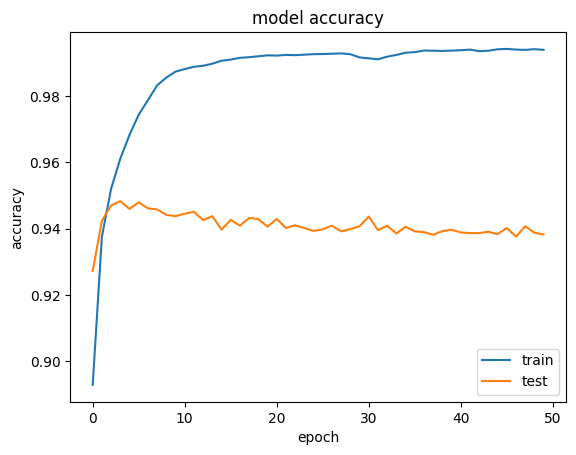

In [66]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

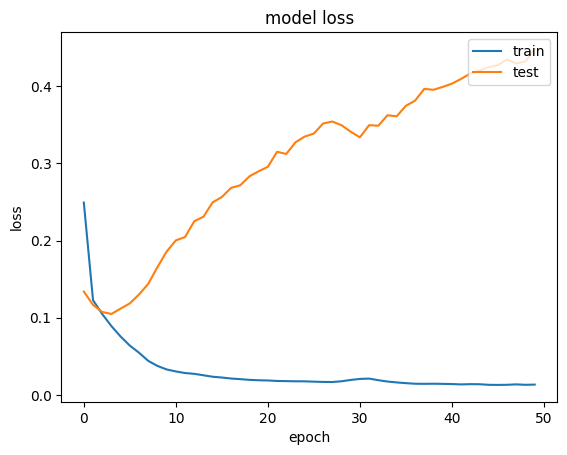

In [67]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['loss'])
plt.plot(rnn_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper right")
plt.show()

In [68]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9431 - loss: 0.4100
Loss: 0.42425239086151123,
Accuracy: 0.9410020709037781


### Save model

In [69]:
#Save model
rnn_model.save('my_model.keras')

### Load model

In [70]:
import tensorflow as tf
from tf.keras.models import load_model

reconstructed_model = load_model("my_model.keras")

## Bi LSTM model

In [49]:
NUM_CLASSES = Y.shape[2]
VOCABULARY_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_SIZE  = 150

### Compile model

In [50]:
# biLstmModel = tf.keras.Sequential()

# biLstmModel.add(tf.keras.Input(shape=(max_length,)))
# biLstmModel.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, trainable=False))

# biLstmModel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)))
# biLstmModel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=True)))

# biLstmModel.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')))

# Creating the model 
biLstmModel = tf.keras.Sequential([ 
    tf.keras.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=True)), 
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')),
]) 
biLstmModel.summary()
biLstmModel.compile(loss      =  'categorical_crossentropy',
                    optimizer =  'Adam',
                    metrics   =  ['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 150)          603450    
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          110080    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 64)           41216     
 onal)                                                           
                                                                 
 time_distributed (TimeDist  (None, 100, 3)            195       
 ributed)                                                        
                                                                 
Total params: 754941 (2.88 MB)
Trainable params: 151491 (591.76 KB)
Non-trainable params: 603450 (2.30 MB)
______________

### Train model

In [51]:
with tf.device('/device:GPU:1'):
    EPOCHS=50
    bilstm_training = biLstmModel.fit(X_train, Y_train, batch_size=64, epochs=EPOCHS, validation_data=(X_validation, Y_validation))

Epoch 1/50


30/30 [==============================] - 12s 176ms/step - loss: 0.4360 - accuracy: 0.8206 - val_loss: 0.2421 - val_accuracy: 0.9268
Epoch 2/50
30/30 [==============================] - 4s 117ms/step - loss: 0.1947 - accuracy: 0.9229 - val_loss: 0.1512 - val_accuracy: 0.9295
Epoch 3/50
30/30 [==============================] - 4s 130ms/step - loss: 0.1396 - accuracy: 0.9281 - val_loss: 0.1323 - val_accuracy: 0.9314
Epoch 4/50
30/30 [==============================] - 4s 122ms/step - loss: 0.1323 - accuracy: 0.9288 - val_loss: 0.1291 - val_accuracy: 0.9320
Epoch 5/50
30/30 [==============================] - 3s 114ms/step - loss: 0.1302 - accuracy: 0.9290 - val_loss: 0.1278 - val_accuracy: 0.9319
Epoch 6/50
30/30 [==============================] - 3s 112ms/step - loss: 0.1284 - accuracy: 0.9293 - val_loss: 0.1260 - val_accuracy: 0.9315
Epoch 7/50
30/30 [==============================] - 4s 120ms/step - loss: 0.1263 - accuracy: 0.9296 - val_loss: 0.1245 - val_accuracy: 0.9309
Epo

### Evaluate model

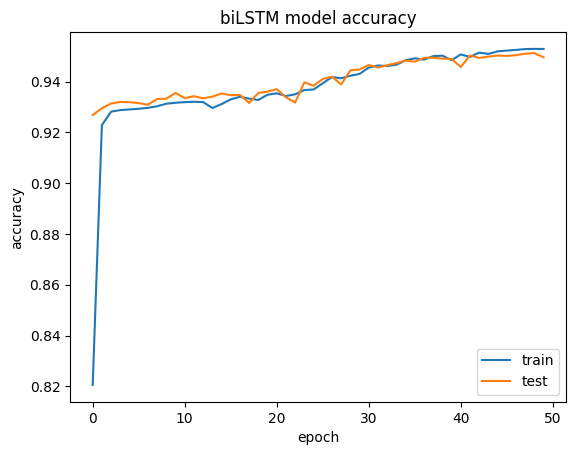

In [52]:
import matplotlib.pyplot as plt

plt.plot(bilstm_training.history['accuracy'])
plt.plot(bilstm_training.history['val_accuracy'])
plt.title('biLSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

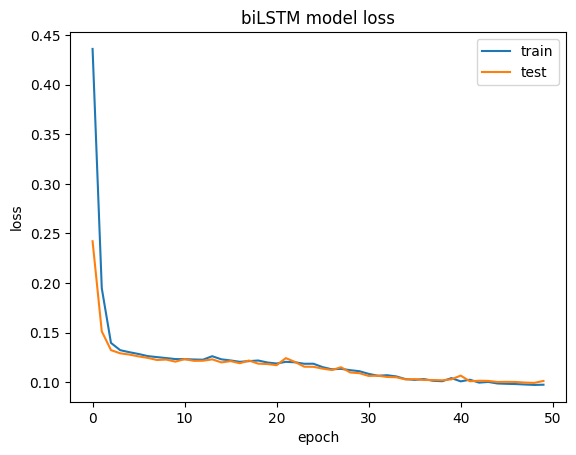

In [53]:
import matplotlib.pyplot as plt

plt.plot(bilstm_training.history['loss'])
plt.plot(bilstm_training.history['val_loss'])
plt.title('biLSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper right")
plt.show()

In [54]:
loss_bilstm, accuracy_bilstm = biLstmModel.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss_bilstm, accuracy_bilstm))

15/15 [==============================] - 1s 32ms/step - loss: 0.0969 - accuracy: 0.9505
Loss: 0.09686370939016342,
Accuracy: 0.9505428075790405


### Save model

In [58]:
biLstmModel.save("biLSTM.keras")

### Load model

In [59]:
from tensorflow.keras.models import load_model

reconstructed_biLstmModel = load_model("biLSTM.keras")

# 5. Demo prediction

In [31]:
#Load tokenizer
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer_load = pickle.load(handle)

In [32]:
#Load model
from tensorflow.keras.models import load_model
reconstructed_biLstmModel = load_model("biLSTM.keras")

In [44]:
text =  ''' Tôi muốn một chiếc điện thoại có cấu hình cao đủ để chơi game và có camera chụp hình đẹp. 
            Điện thoại đó nên có hệ điều hành android.
        '''
text_pre = preprocess_text(text)
text_pre_token = [text_pre.split()]

max_length = 100
trunc_type='post'

sequences = tokenizer_load.texts_to_sequences(text_pre_token)
input_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

In [45]:
predict = reconstructed_biLstmModel.predict(input_padded)

1/1 [==============================] - 0s 62ms/step


In [46]:
import numpy as np
label_key_phrases = np.argmax(predict[0],axis=1, out=None)

In [47]:
print(input_padded.shape)
print(predict.shape)
print(label_key_phrases.shape)

(1, 100)
(1, 100, 3)
(100,)


In [48]:
text_rever = tokenizer_load.sequences_to_texts(input_padded)
text_rever

['<OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> điện_thoại cấu_hình game camera chụp hình đẹp điện_thoại hệ điều_hành android']

In [49]:
text_rever_split = text_rever[0].split()

In [50]:
key_phrases = [text_rever_split[i] for i in range(len(label_key_phrases)) if label_key_phrases[i] == 1]

In [51]:
def remove_items(test_list, item): 
    # using filter() + __ne__ to perform the task 
    res = list(filter((item).__ne__, test_list)) 
    return res 

In [52]:
key_phrases = remove_items(key_phrases, '<OOV>')

In [53]:
key_phrases_nonToken = [i.replace("_"," ") for i in key_phrases]

In [54]:
key_phrases_nonToken

['điện thoại',
 'cấu hình',
 'game',
 'camera',
 'chụp',
 'hình',
 'đẹp',
 'điện thoại',
 'hệ',
 'điều hành',
 'android']